In [1]:
import sys
sys.path.append("../")

In [2]:
from ideal_rcf.dataloader.config import SetConfig, set_dataset_path
from ideal_rcf.dataloader.caseset import CaseSet

from ideal_rcf.foam.postprocess import FoamLoader
from ideal_rcf.foam.visualization import FoamPlottingTools

from utils import fetch_experiments

import os

In [3]:
### Set DataSet Path ad Environ Var
set_dataset_path()
fetch_experiments()

In [4]:
os.getenv('DATASET_PATH')

'D:/OneDrive - Universidade de Lisboa/Turbulence Modelling Database'

## Set CaseSet Params

In [5]:
dataset_path = os.getenv('DATASET_PATH')
turb_dataset = 'komegasst'
custom_turb_dataset = 'a_3_1_2_NL_S_DNS_eV'

case = [
    'PHLL_case_0p5',
    'PHLL_case_0p8',
    'PHLL_case_1p0',
    'PHLL_case_1p2',
    'PHLL_case_1p5'
]

trainset = [
    'PHLL_case_0p5',
    'PHLL_case_0p8',
    'PHLL_case_1p5'
]

valset = [
    'PHLL_case_1p0',
]

testset = [
    'PHLL_case_1p2',
]

features_filter = ['I1_1', 'I1_2', 'I1_3', 'I1_4', 'I1_5', 'I1_6', 'I1_8', 'I1_9', 'I1_15', 'I1_17', 'I1_19', 'I2_3', 'I2_4', 'q_1', 'q_2']

features = ['I1', 'I2', 'q']
features_cardinality = [20, 20, 4]

tensor_features = ['Tensors']
tensor_features_linear = ['Shat']
labels = ['a']

tensor_features_oev = ['S_DNS']


features_transforms = ['same_sign_log']
skip_features_transforms_for = ['I1_2', 'I1_5', 'I1_8','I1_15','I1_17', 'I1_19', 'q_1', 'q_2', 'q_3', 'q_4']

In [6]:
no_labes_CaseSetConfig = SetConfig(
        cases=case,
        turb_dataset=turb_dataset,
        dataset_path=dataset_path,
        trainset=trainset,
        valset=valset,
        testset=testset,
        features=features,
        tensor_features=tensor_features,
        tensor_features_linear=tensor_features_linear,
        # labels=labels,
        custom_turb_dataset=custom_turb_dataset,
        tensor_features_oev=tensor_features_oev,
        features_filter=features_filter,
        features_cardinality=features_cardinality,
        features_transforms=features_transforms,
        skip_features_transforms_for=skip_features_transforms_for,
        enable_mixer=True,
        debug=True,
    )

### Load PHLL_case_1p2

In [7]:
PHLL_case_1p2 = CaseSet(case='PHLL_case_1p2', set_config=no_labes_CaseSetConfig)

[PHLL_case_1p2] sucessfuly filtered features ['I1', 'I2', 'q'] to ['I1_1', 'I1_2', 'I1_3', 'I1_4', 'I1_5', 'I1_6', 'I1_8', 'I1_9', 'I1_15', 'I1_17', 'I1_19', 'I2_3', 'I2_4', 'q_1', 'q_2']
PHLL_case_1p2:
 > features (['I1', 'I2', 'q']): (14751, 15)
 > tensor_features (Tensors): (14751, 20, 3, 3)
 > tensor_features_linear (Shat): (14751, 3)
 > tensor_features_oev (S_DNS): (14751, 3)
 > Cx (Cx): (14751, 1)
 > Cy (Cy): (14751, 1)


### Load OpenFoam results

In [9]:
FoamLoader(PHLL_case_1p2).read_from_dir('./experiments/final_results_cross_val/fold_1_test/foam/PHLL_case_1p2')

You can use ```__dict__``` to view all attributes from the CaseSet obj. Notice that the oaded openfoam quantities have been included

In [10]:
PHLL_case_1p2.__dict__

{'config': <ideal_rcf.dataloader.config.SetConfig at 0x24c7723d820>,
 'set_id': None,
 'case': ['PHLL_case_1p2'],
 'features': array([[ 3.52655536e-03, -2.30332555e-08, -3.52655535e-03, ...,
          1.31316595e-09, -1.56598000e-06,  2.11248000e-03],
        [ 3.51913518e-03,  8.50430689e-09, -3.51911840e-03, ...,
          1.29887087e-09, -3.99378000e-07,  2.11120000e-03],
        [ 3.52072938e-03, -2.41393001e-08, -3.52071257e-03, ...,
          1.29213363e-09, -1.80109000e-06,  2.11392000e-03],
        ...,
        [ 6.60210443e-05,  3.37002450e-09, -6.61555935e-05, ...,
          1.14688852e-12,  1.01735000e-03,  2.75377000e-04],
        [ 1.46928937e-04,  2.04128333e-09, -1.47141180e-04, ...,
          3.42657896e-12,  7.22418000e-04,  4.24145000e-04],
        [ 1.12771593e-04, -1.34911451e-09, -1.12828439e-04, ...,
          4.51692196e-12,  2.53072000e-04,  3.67462000e-04]]),
 'tensor_features': array([[[[ 1.76327768e-03,  1.82841053e-07,  2.22656039e-27],
          [ 1.8284105

In [11]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

metrics_list = [mean_squared_error, r2_score, mean_absolute_error]

foamplotter = FoamPlottingTools(metrics_list, exp_id='OEVNLTBNN')

### View Parity and Scalar Plots for velocity

 [||U||]
  > mean_squared_error: 3.890e-08
  > r2_score: 1.000
  > mean_absolute_error: 1.289e-04


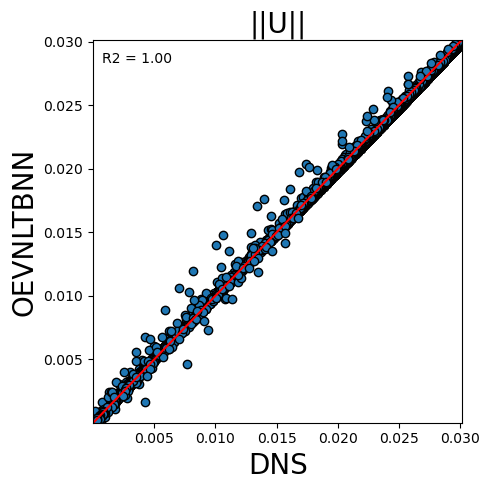

In [12]:
foamplotter.parity_plots(PHLL_case_1p2)

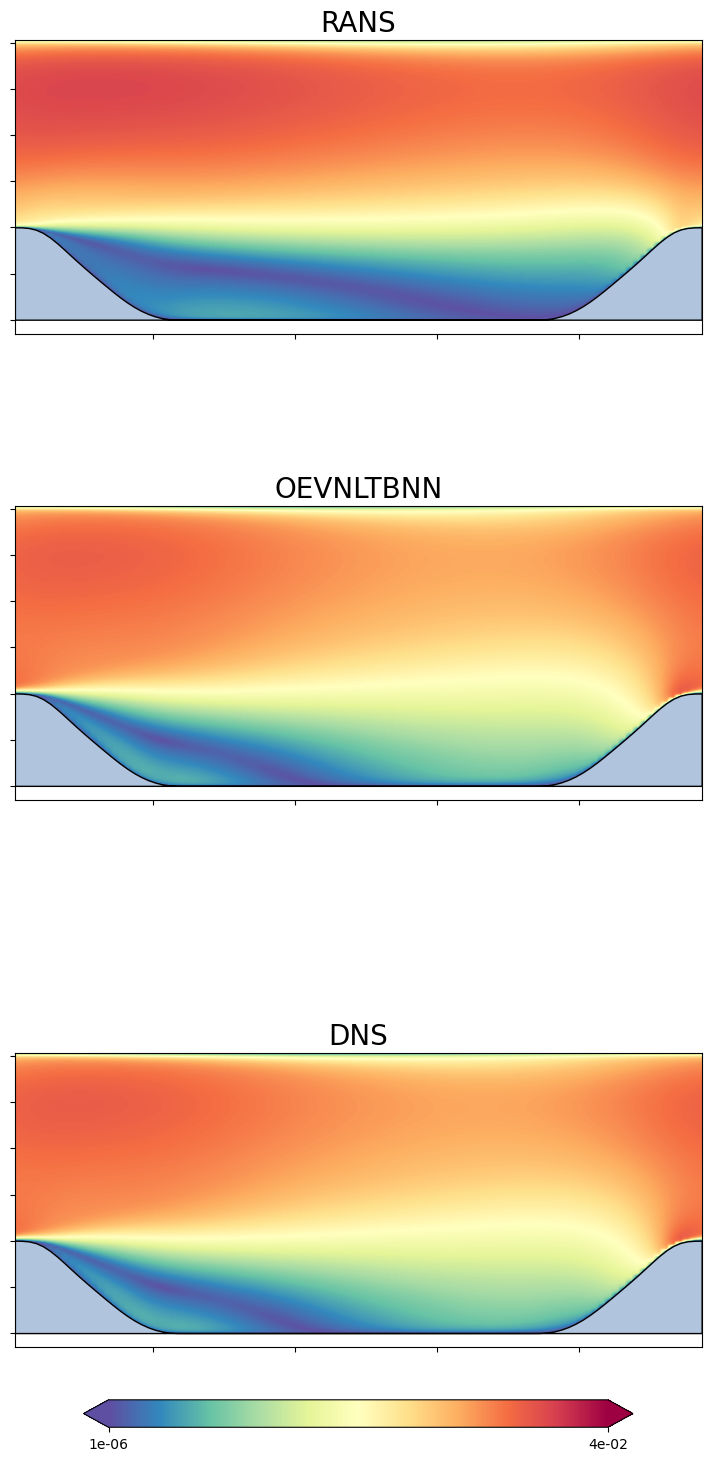

In [13]:
foamplotter.velocity_plots(PHLL_case_1p2)

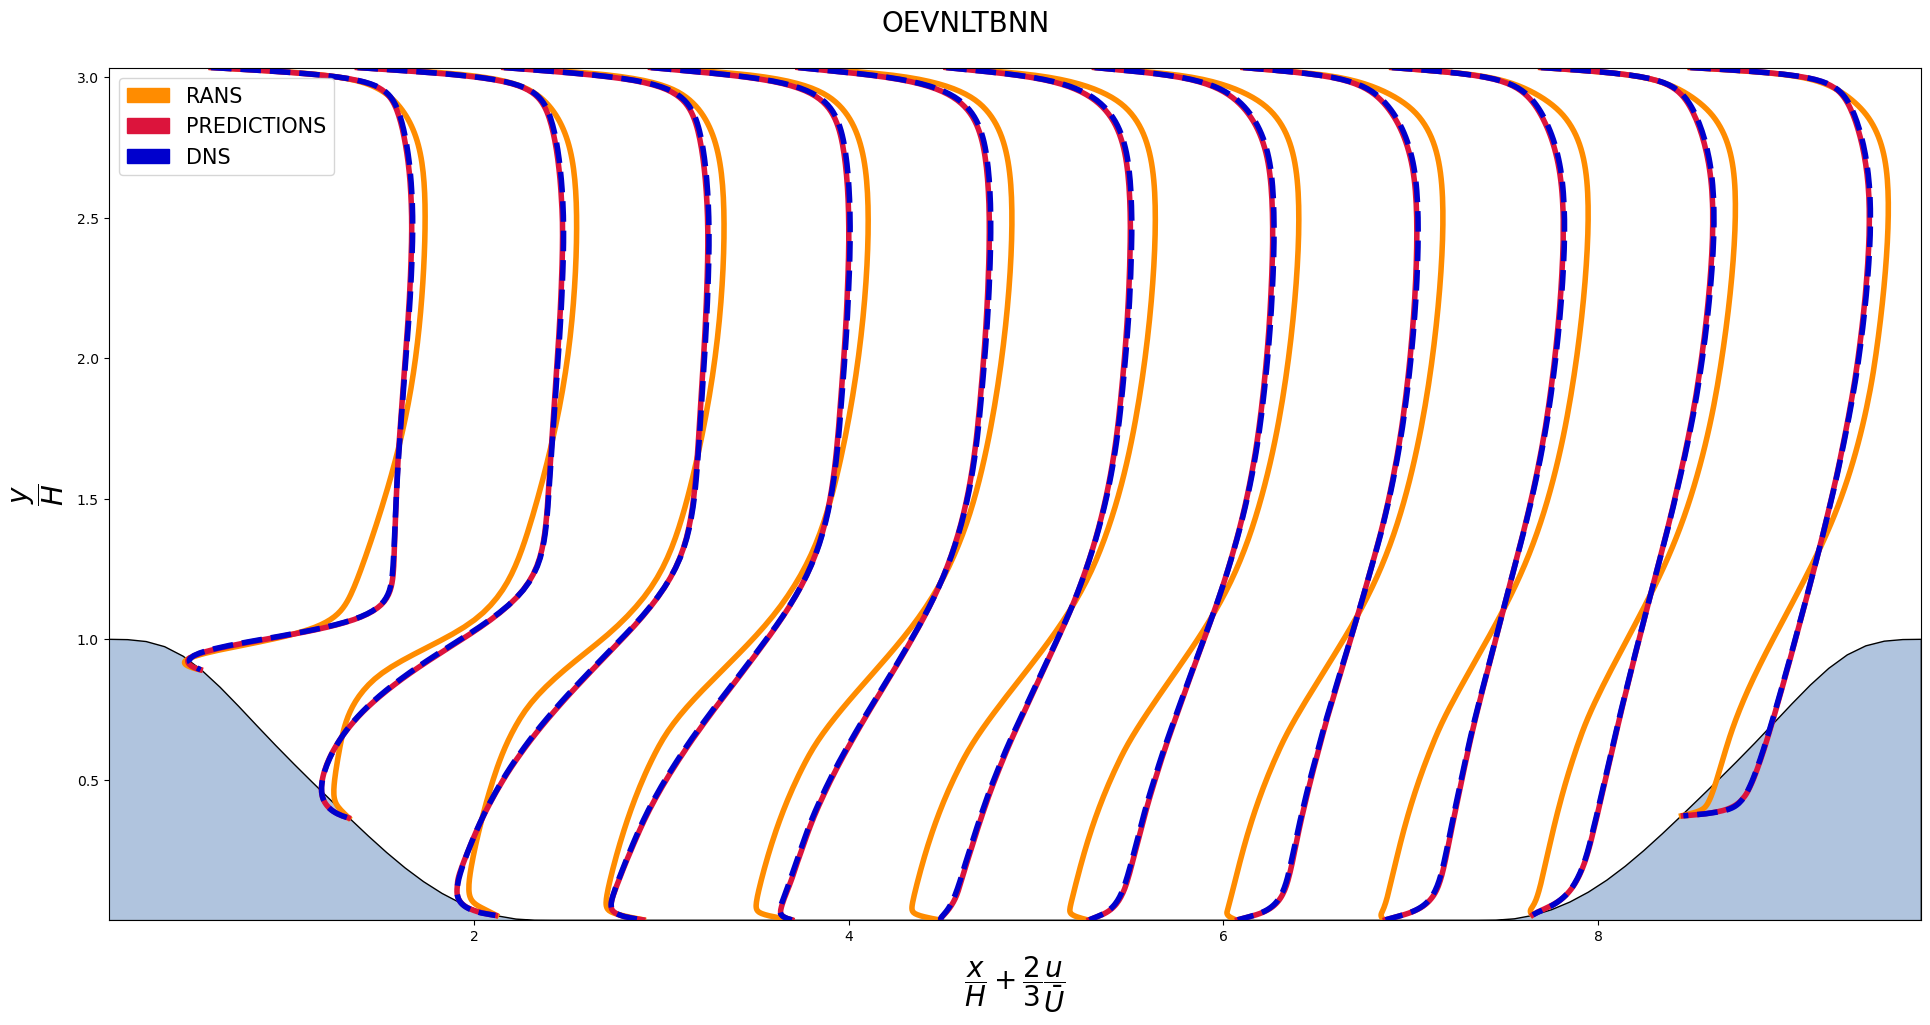

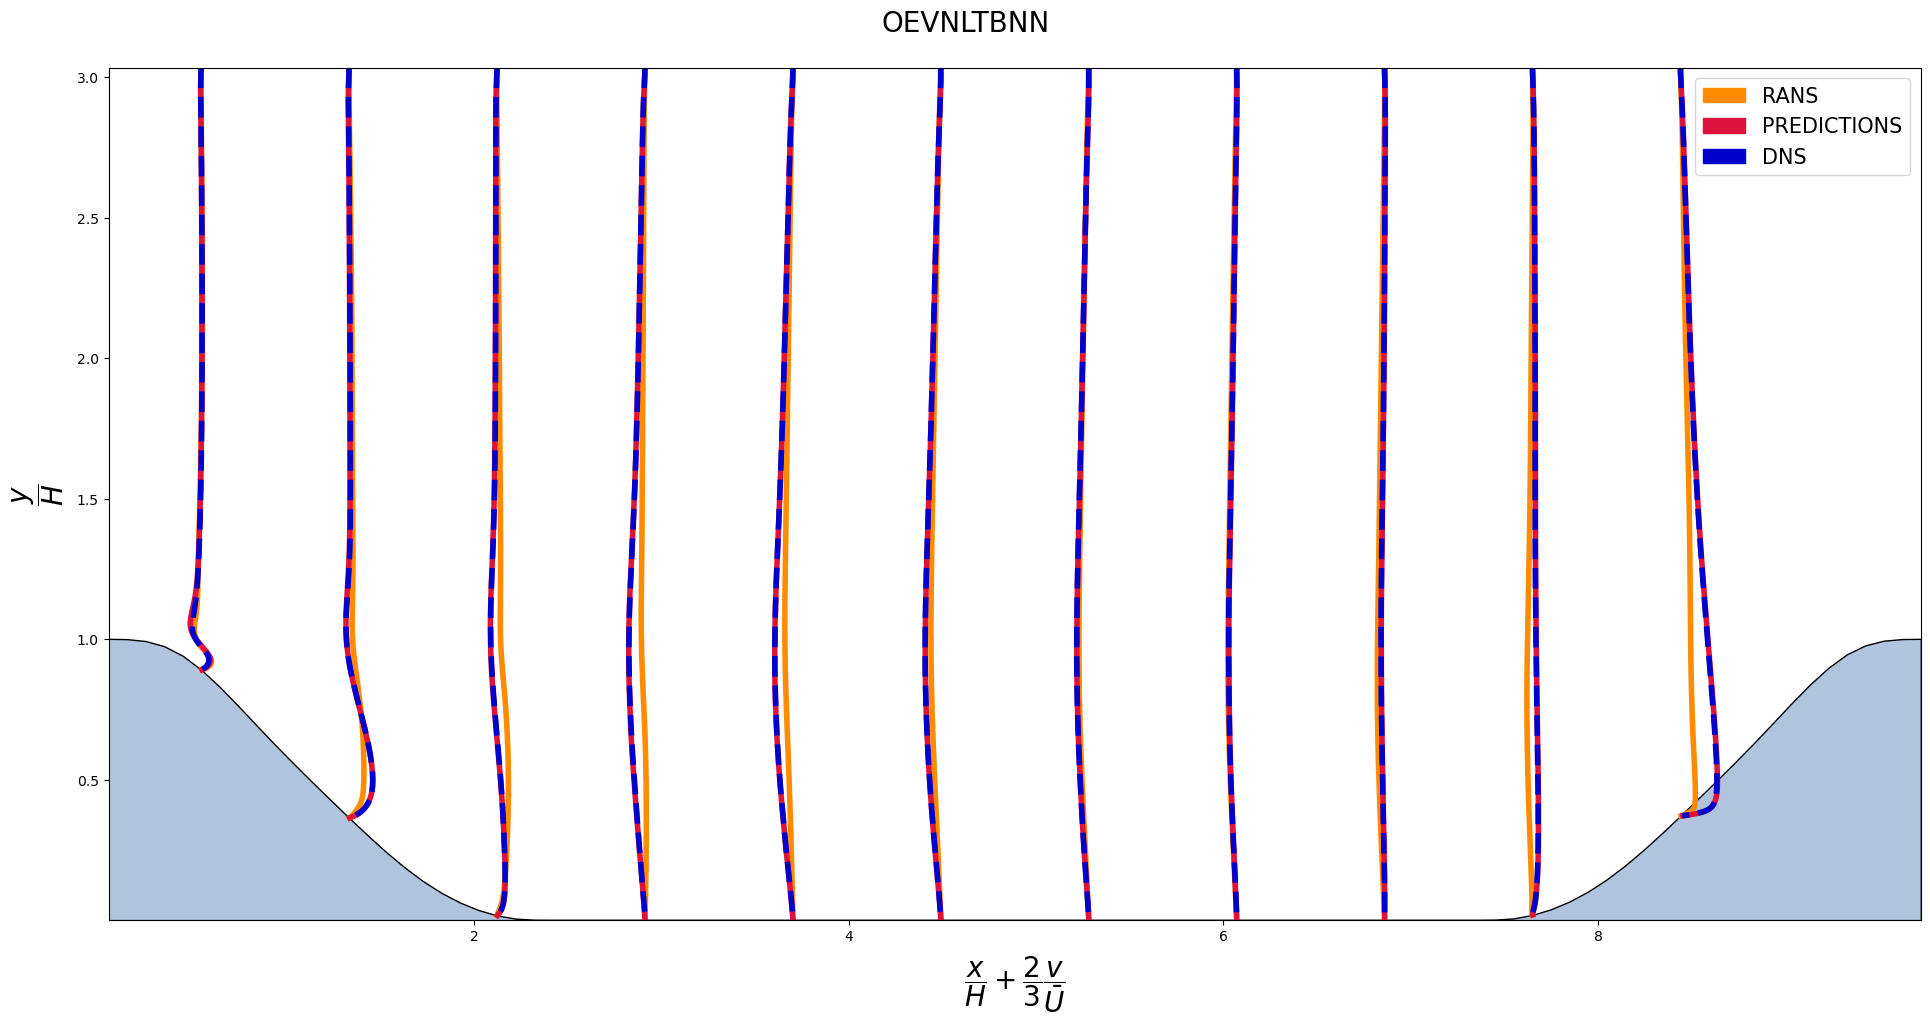

In [14]:
foamplotter.plot_velocity_profiles(PHLL_case_1p2)

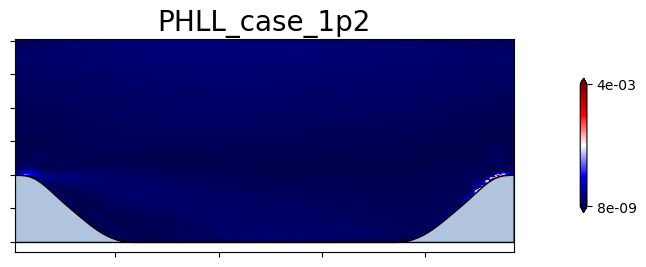

In [15]:
foamplotter.get_plots_error(PHLL_case_1p2, foamplotter.velocity_abs_error, cmap_id='seismic')

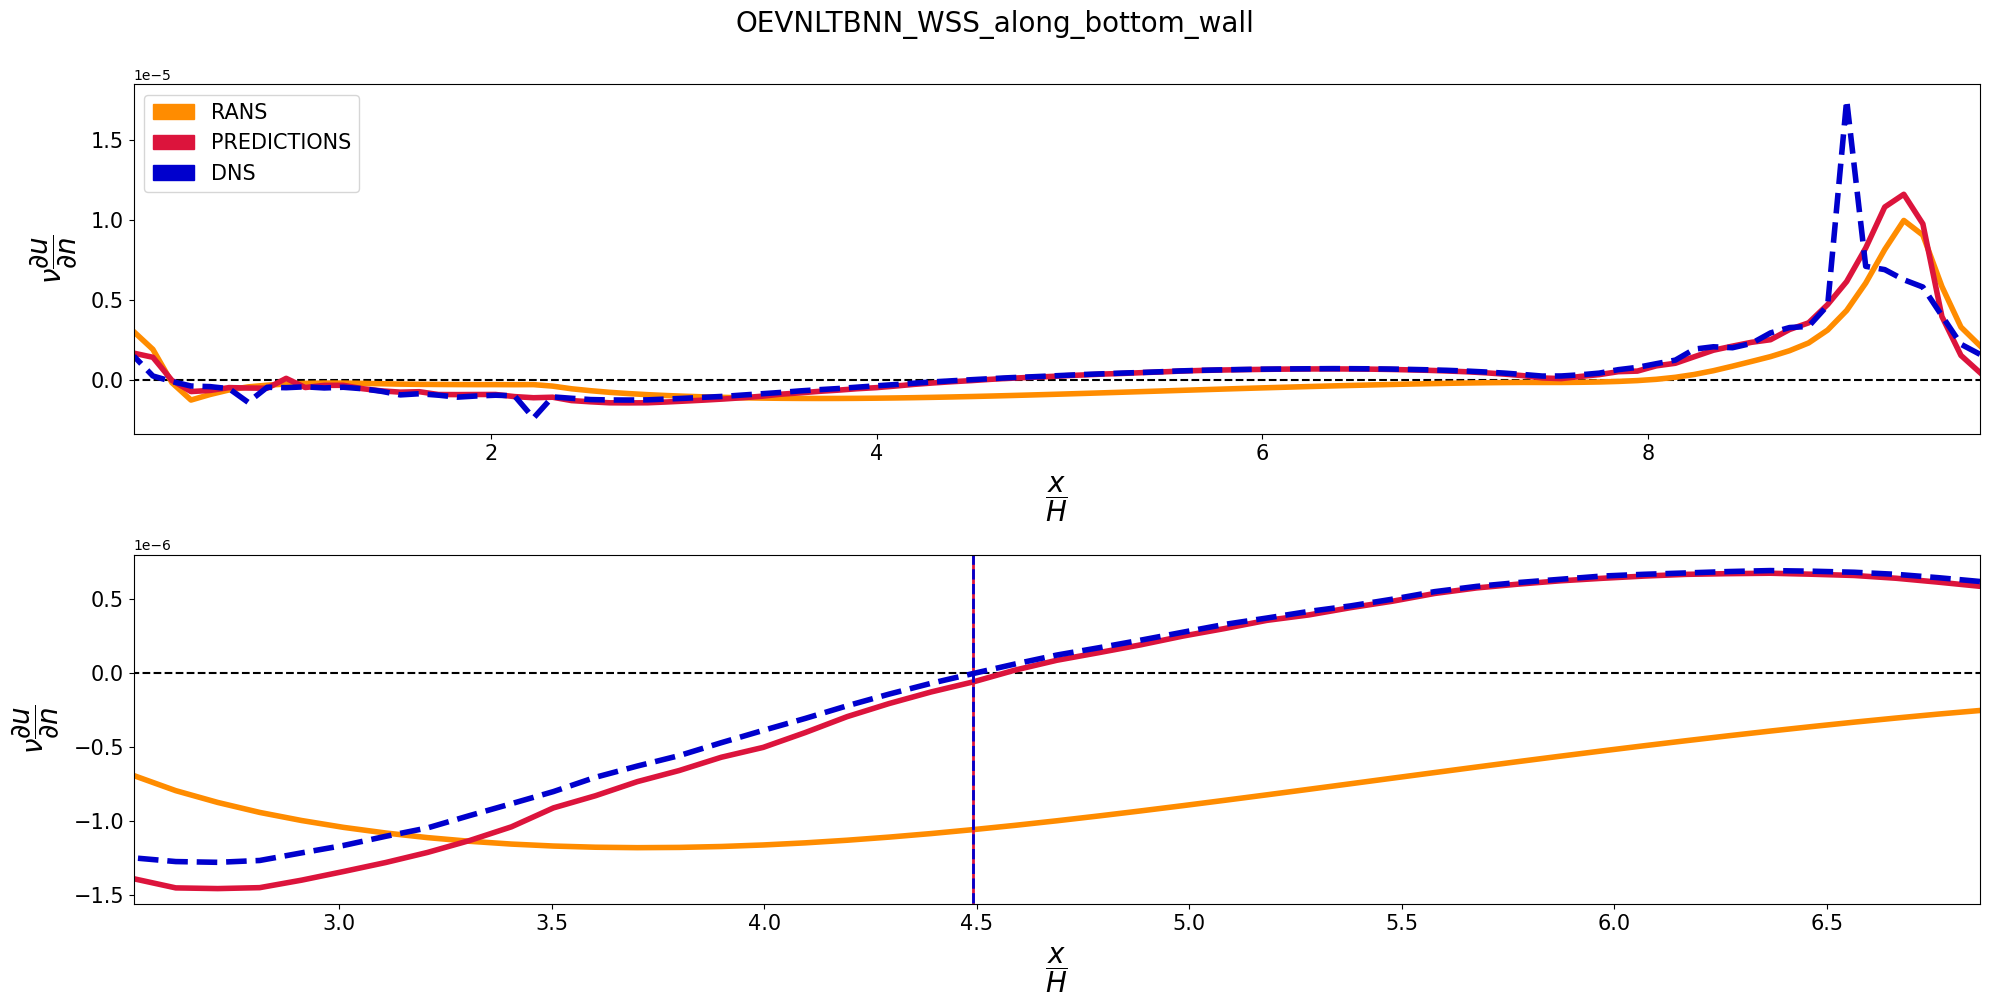

In [16]:
foamplotter.plot_wall_sheer_stress(PHLL_case_1p2, wall='bottom')

In [17]:
import os

In [18]:
os.getcwd()

'c:\\Users\\GL504GS\\Desktop\\repos\\iDeal_RCF\\examples'

In [19]:
config_path = os.path.expanduser('~\\.my_package\\config.json')

In [20]:
config_path

'C:\\Users\\GL504GS\\.my_package\\config.json'

In [21]:
os.path.split(os.path.split(os.getcwd())[0])

('c:\\Users\\GL504GS\\Desktop\\repos', 'iDeal_RCF')

In [22]:
os.listdir(os.path.split(os.getcwd())[0])

['.cache',
 '.git',
 '.gitignore',
 'autogen_utils',
 'build',
 'code_base',
 'code_references',
 'dist',
 'examples',
 'ideal_rcf',
 'ideal_rcf.egg-info',
 'LICENSE',
 'MyCodingAgent.ipynb',
 'openfoam_custom_models',
 'project_root',
 'README.md',
 'setup.py']